# EDA (Explore Data Analysis)

## EDA Step 0 (Setup and Control)

### Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

# display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)


### Load Dataset

In [3]:
data = pd.read_csv('/home/ooka/BACKUP ARCH/jinx/Belajar/ML Projects/home_credit_default_risk/data/dataset/application_train.csv')

### Show row and column Dataset

Dataset memiliki ~300 ribu baris, yang merepresentasikan jumlah pengajuan pinjaman, dan ratusan fitur yang menggambarkan kondisi finansial dan demografi nasabah.

In [4]:
data.shape

(307511, 122)

### Check Stucture and Data Type

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Show Data for Example

In [6]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

### Check Duplicate Rows

In [7]:
data.duplicated().sum()

np.int64(0)

### Check Unique ID Column

In [8]:
data['SK_ID_CURR'].nunique(), data.shape[0]

(307511, 307511)

### Chech Distribution Target Column

In [9]:
target_count = data['TARGET'].value_counts()
target_percentage = data['TARGET'].value_counts(normalize=True) * 100

print(target_count)
print(target_percentage)

TARGET
0    282686
1     24825
Name: count, dtype: int64
TARGET
0   91.93
1    8.07
Name: proportion, dtype: float64


Target sangat tidak seimbang, dengan proporsi default yang jauh lebih kecil dibandingkan non-default. Hal ini mengindikasikan bahwa accuracy bukan metric utama yang tepat.

### EDA 0 Summary :
Dataset application_train.csv terdiri dari X baris dan Y kolom, di mana setiap baris merepresentasikan satu pengajuan pinjaman. 
Tidak ditemukan duplikasi data dan setiap aplikasi memiliki ID unik. Target bersifat imbalanced dengan proporsi default sekitar Z%, 
sehingga evaluasi model perlu mempertimbangkan metric selain accuracy.

### Conlusion
Dataset valid secara struktur dan siap untuk eksplorasi lebih lanjut terkait target, kualitas data, dan pola perilaku nasabah.

## EDA Step 1 (TARGET Analysis, Visualization Imbalance, and Business Implication)

### Distribution TARGET Visualization

#### Target Distribution Insight

#### Business Interpretation 
Proporsi nasabah yang mengalami gagal bayar jauh lebih kecil dibandingkan nasabah yang tidak gagal bayar. Hal ini menunjukkan bahwa dataset bersifat imbalanced. Dalam konteks bisnis, kesalahan dalam memprediksi nasabah yang akan gagal bayar (false negative) dapat menyebabkan kerugian finansial yang signifikan, sehingga model harus dioptimalkan untuk mendeteksi kelas minoritas.

#### Business Impact Simulation
Dalam konteks kredit, kesalahan klasifikasi memiliki dampak bisnis yang berbeda. False Positive (nasabah berisiko tinggi diprediksi aman) berpotensi menimbulkan kerugian finansial, sementara False Negative (nasabah aman ditolak) berpotensi mengurangi pendapatan. Oleh karena itu, pemilihan threshold dan metric evaluasi akan sangat menentukan strategi bisnis yang diambil.

In [10]:
target_counts = data['TARGET'].value_counts()
target_pct = data['TARGET'].value_counts(normalize=True) * 100

print(target_counts)
print(target_pct)


TARGET
0    282686
1     24825
Name: count, dtype: int64
TARGET
0   91.93
1    8.07
Name: proportion, dtype: float64


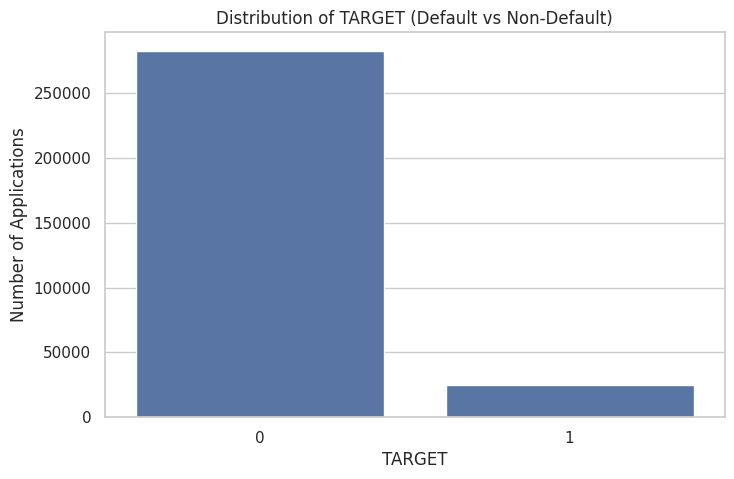

In [11]:
sns.countplot(x='TARGET', data=data)
plt.title('Distribution of TARGET (Default vs Non-Default)')
plt.xlabel('TARGET')
plt.ylabel('Number of Applications')
plt.show()

#### EDA 1 Summary :
Dataset menunjukkan ketidakseimbangan kelas yang signifikan pada variabel target. Kondisi ini menuntut penggunaan metric evaluasi yang lebih tepat seperti ROC-AUC dan Recall. Analisis selanjutnya akan difokuskan pada identifikasi fitur-fitur yang mampu membedakan nasabah berisiko tinggi dan rendah.


## EDA Step 2 (Data Quality and Missing Value)

### Check and Count Missing Value per Column

In [12]:
missing_count = data.isnull().sum()
missing_pct = missing_count / len(data) * 100

missing_df = pd.DataFrame({
    'missing_count': missing_count,
    'missing_pct': missing_pct
}).sort_values(by='missing_pct', ascending=False)

missing_df.head(20)


,missing_count,missing_pct
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
COMMONAREA_MEDI,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_MODE,210199,68.35


### Missing Value Visualization

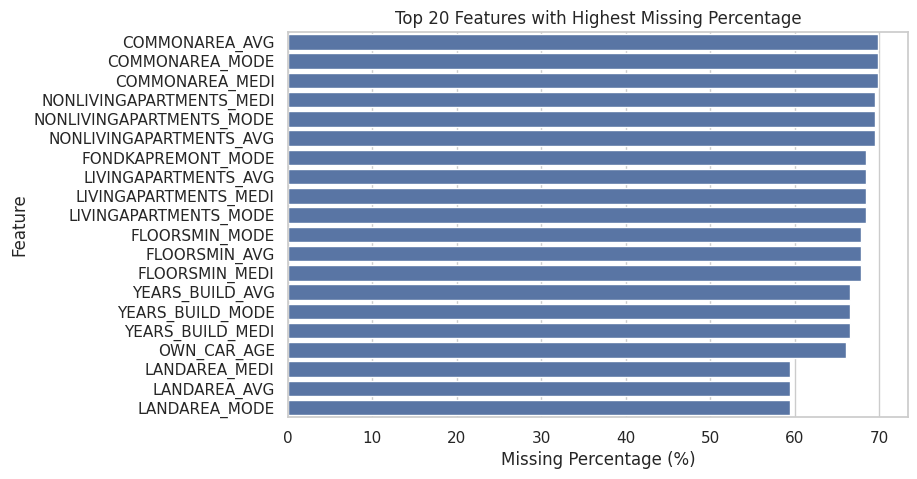

In [13]:
missing_df_head = missing_df[missing_df['missing_pct'] > 0].head(20)

sns.barplot(
    x=missing_df_head['missing_pct'],
    y=missing_df_head.index
)
plt.title('Top 20 Features with Highest Missing Percentage')
plt.xlabel('Missing Percentage (%)')
plt.ylabel('Feature')
plt.show()


### Categorization Missing Value

#### Missing Value Interpretation

Dalam konteks kredit, nilai yang hilang tidak selalu berarti data buruk. Sebaliknya, missing value dapat mengindikasikan bahwa nasabah tidak memiliki produk atau riwayat tertentu (misalnya kartu kredit atau pinjaman sebelumnya). Oleh karena itu, missing value berpotensi menjadi sinyal risiko dan perlu diperlakukan secara hati-hati.

In [14]:
def categorize_missing(pct):
    if pct == 0:
        return 'No Missing'
    elif pct < 10:
        return '<10%'
    elif pct < 30:
        return '10–30%'
    elif pct < 60:
        return '30–60%'
    else:
        return '>60%'

missing_df['missing_category'] = missing_df['missing_pct'].apply(categorize_missing)
missing_df['missing_category'].value_counts()


missing_category
No Missing    55
30–60%        33
>60%          17
<10%          10
10–30%         7
Name: count, dtype: int64

### Show Data

In [15]:
missing_df.head(5)

,missing_count,missing_pct,missing_category
COMMONAREA_AVG,214865,69.87,>60%
COMMONAREA_MODE,214865,69.87,>60%
COMMONAREA_MEDI,214865,69.87,>60%
NONLIVINGAPARTMENTS_MEDI,213514,69.43,>60%
NONLIVINGAPARTMENTS_MODE,213514,69.43,>60%


In [16]:
feature = missing_df.index[0]  # contoh fitur paling banyak missing

data_temp = data[[feature, 'TARGET']].copy()
data_temp['is_missing'] = data_temp[feature].isnull().astype(int)

data_temp.groupby('is_missing')['TARGET'].mean()

is_missing
0   0.07
1   0.09
Name: TARGET, dtype: float64

### Check for anomalous data

#### DAYS_BIRTH

In [17]:
data['DAYS_BIRTH'].describe()

count   307511.00
mean    -16037.00
std       4363.99
min     -25229.00
25%     -19682.00
50%     -15750.00
75%     -12413.00
max      -7489.00
Name: DAYS_BIRTH, dtype: float64

In [18]:
(data['DAYS_BIRTH'] / -365).describe()

count   307511.00
mean        43.94
std         11.96
min         20.52
25%         34.01
50%         43.15
75%         53.92
max         69.12
Name: DAYS_BIRTH, dtype: float64

#### DAYS_EMPLOYED

In [19]:
data['DAYS_EMPLOYED'].describe()

count   307511.00
mean     63815.05
std     141275.77
min     -17912.00
25%      -2760.00
50%      -1213.00
75%       -289.00
max     365243.00
Name: DAYS_EMPLOYED, dtype: float64

In [20]:
data['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-199         151
-230         151
Name: count, dtype: int64

In [21]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

len(num_cols), len(cat_cols)


(106, 16)

In [ ]:
summary = data[num_cols].describe().T
summary[['min', 'max']].head()


,min,max
SK_ID_CURR,100002.00,456255.00
TARGET,0.00,1.00
CNT_CHILDREN,0.00,19.00
AMT_INCOME_TOTAL,25650.00,117000000.00
AMT_CREDIT,45000.00,4050000.00


In [ ]:
summary['range'] = summary['max'] - summary['min']
summary.sort_values(by='range', ascending=False).head(15)

,count,mean,std,min,25%,50%,75%,max,range
AMT_INCOME_TOTAL,307511.00,168797.92,237123.15,25650.00,112500.00,147150.00,202500.00,117000000.00,116974350.00
AMT_GOODS_PRICE,307233.00,538396.21,369446.46,40500.00,238500.00,450000.00,679500.00,4050000.00,4009500.00
AMT_CREDIT,307511.00,599026.00,402490.78,45000.00,270000.00,513531.00,808650.00,4050000.00,4005000.00
DAYS_EMPLOYED,307511.00,63815.05,141275.77,-17912.00,-2760.00,-1213.00,-289.00,365243.00,383155.00
SK_ID_CURR,307511.00,278180.52,102790.18,100002.00,189145.50,278202.00,367142.50,456255.00,356253.00
AMT_ANNUITY,307499.00,27108.57,14493.74,1615.50,16524.00,24903.00,34596.00,258025.50,256410.00
DAYS_REGISTRATION,307511.00,-4986.12,3522.89,-24672.00,-7479.50,-4504.00,-2010.00,0.00,24672.00
DAYS_BIRTH,307511.00,-16037.00,4363.99,-25229.00,-19682.00,-15750.00,-12413.00,-7489.00,17740.00
DAYS_ID_PUBLISH,307511.00,-2994.20,1509.45,-7197.00,-4299.00,-3254.00,-1720.00,0.00,7197.00
DAYS_LAST_PHONE_CHANGE,307510.00,-962.86,826.81,-4292.00,-1570.00,-757.00,-274.00,0.00,4292.00


In [27]:
suspect_cols = [c for c in num_cols if 
                c.startswith('DAYS_') or 
                c.startswith('AMT_') or 
                c.startswith('CNT_')]

In [30]:
data['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-199         151
-230         151
Name: count, dtype: int64

#### EDA 2 Summary :
Dataset memiliki banyak fitur dengan missing value yang signifikan. Namun, missing value pada dataset ini tidak selalu merepresentasikan data yang rusak, melainkan sering kali menunjukkan absennya produk atau riwayat kredit tertentu. Oleh karena itu, strategi penanganan missing value akan disesuaikan dengan konteks bisnis dan perilaku nasabah, bukan sekadar penghapusan data.


## EDA Step 3 (Numerical Features vs Target)

Calon fitur kandidat (fitur inti dari credit scoring) : 
```
num_features = [
    'DAYS_BIRTH',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS',
    'DAYS_EMPLOYED'
]
```

### Prepare Targer Column
1 = gagal bayar (high risk)
0 = aman

In [31]:
data['TARGET'].value_counts(normalize=True)


TARGET
0   0.92
1   0.08
Name: proportion, dtype: float64

### Analysis Distribution (Numerik vs Target)

#### Days Birth

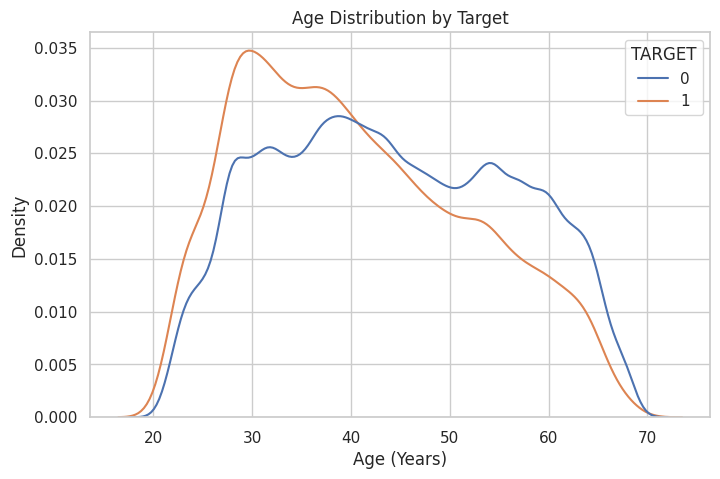

In [35]:
data['AGE_YEARS'] = data['DAYS_BIRTH'] / -365

sns.kdeplot(
    data=data,
    x='AGE_YEARS',
    hue='TARGET',
    common_norm=False
)
plt.title('Age Distribution by Target')
plt.xlabel('Age (Years)')
plt.show()


Nasabah dengan usia lebih muda cenderung memiliki tingkat gagal bayar yang lebih tinggi dibandingkan nasabah yang lebih tua, menunjukkan bahwa usia merupakan faktor risiko yang relevan.

#### Income (AMT_INCOME_TOTAL)

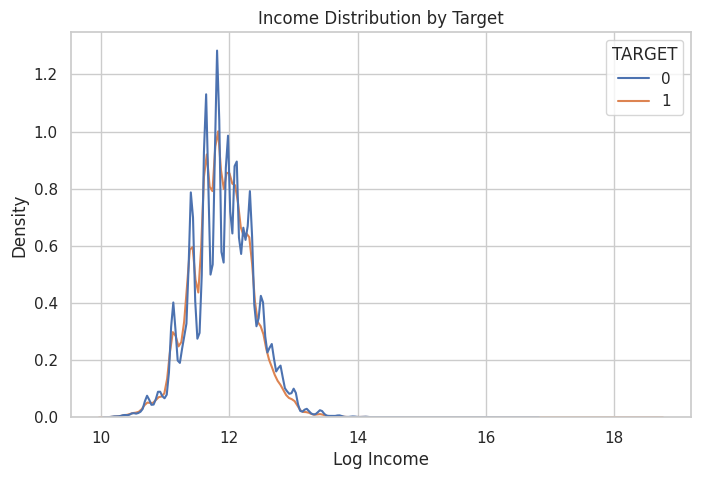

In [36]:
data['LOG_INCOME'] = np.log1p(data['AMT_INCOME_TOTAL'])

sns.kdeplot(
    data=data,
    x='LOG_INCOME',
    hue='TARGET',
    common_norm=False
)
plt.title('Income Distribution by Target')
plt.xlabel('Log Income')
plt.show()


#### Credit Amount (AMT_CREDIT)

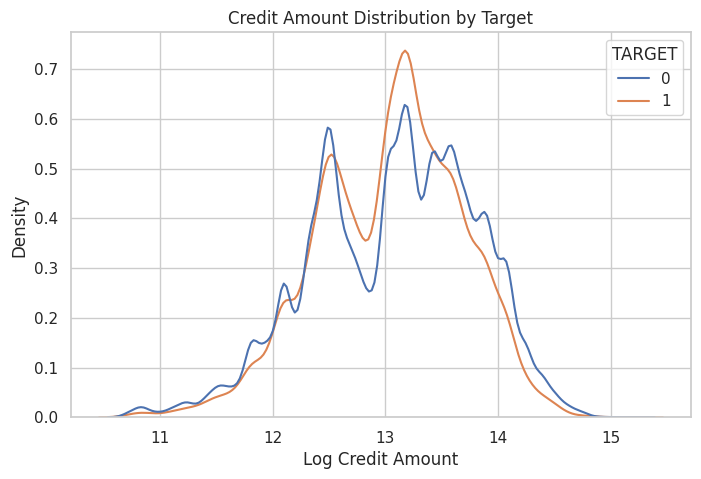

In [37]:
data['LOG_CREDIT'] = np.log1p(data['AMT_CREDIT'])

sns.kdeplot(
    data=data,
    x='LOG_CREDIT',
    hue='TARGET',
    common_norm=False
)
plt.title('Credit Amount Distribution by Target')
plt.xlabel('Log Credit Amount')
plt.show()


#### Annuity (AMT_ANNUITY)

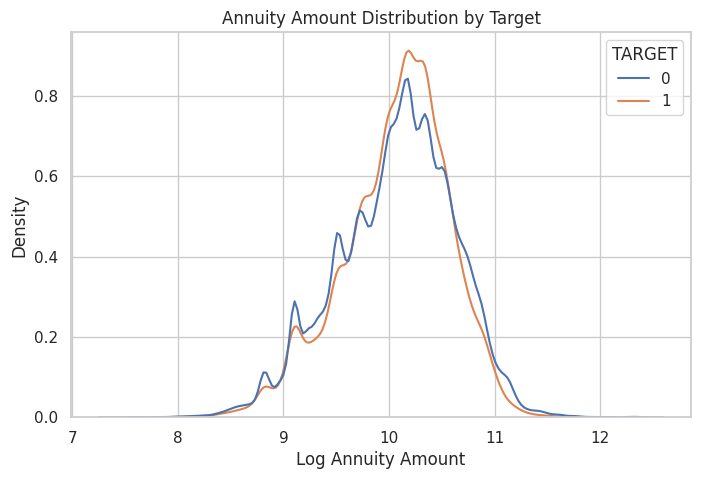

In [43]:
data['LOG_ANNUITY'] = np.log1p(data['AMT_ANNUITY'])

sns.kdeplot(
    data=data,
    x='LOG_ANNUITY',
    hue='TARGET',
    common_norm=False
)
plt.title('Annuity Amount Distribution by Target')
plt.xlabel('Log Annuity Amount')
plt.show()


#### Count Children (CNT_CHILD)

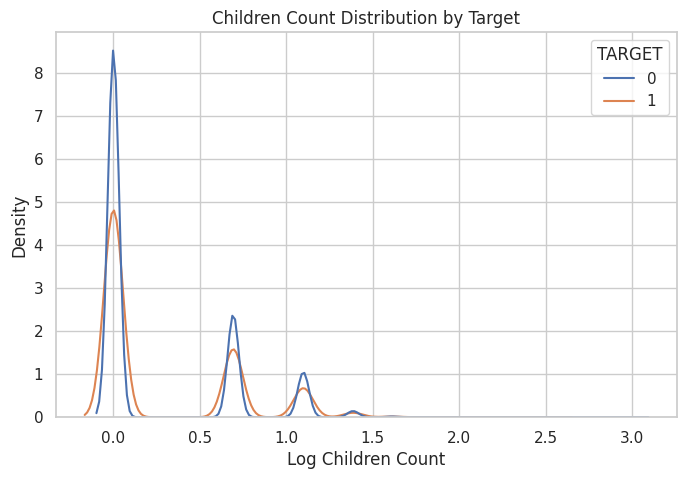

In [56]:
data['LOG_CHILDREN'] = np.log1p(data['CNT_CHILDREN'])

sns.kdeplot(
    data=data,
    x='LOG_CHILDREN',
    hue='TARGET',
    common_norm=False
)
plt.title('Children Count Distribution by Target')
plt.xlabel('Log Children Count')
plt.show()


#### Count Family Member (CNT_FAM_MEMBER)

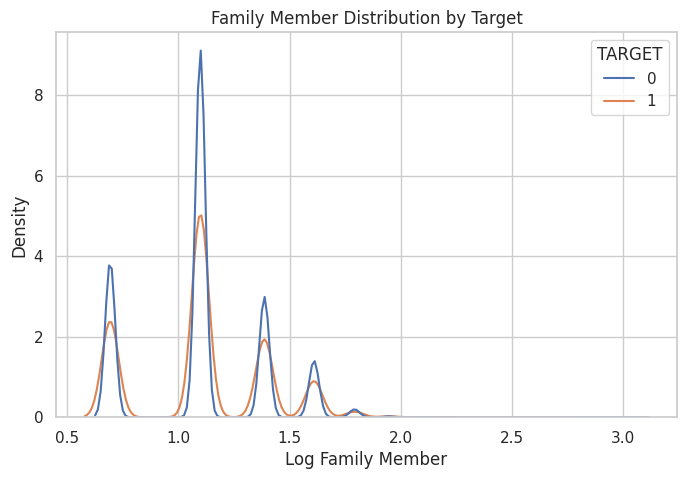

In [49]:
data['LOG_FAM_MEMBERS'] = np.log1p(data['CNT_FAM_MEMBERS'])

sns.kdeplot(
    data=data,
    x='LOG_FAM_MEMBERS',
    hue='TARGET',
    common_norm=False
)
plt.title('Family Member Distribution by Target')
plt.xlabel('Log Family Member')
plt.show()


#### Days Employed (DAYS_EMPLOYED)

/tmp/ipykernel_453882/220851705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_working['EMPLOYED_YEARS'] = df_working['DAYS_EMPLOYED'] / -365


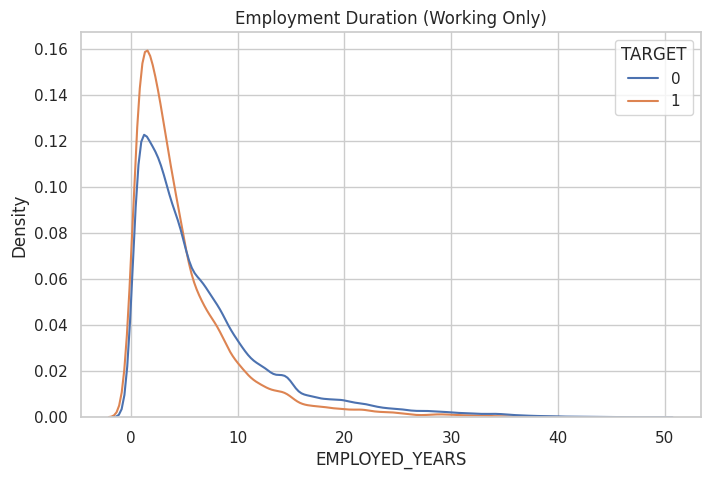

In [57]:
df_working = data[data['DAYS_EMPLOYED'] != 365243]
df_working['EMPLOYED_YEARS'] = df_working['DAYS_EMPLOYED'] / -365

sns.kdeplot(
    data=df_working,
    x='EMPLOYED_YEARS',
    hue='TARGET',
    common_norm=False
)
plt.title('Employment Duration (Working Only)')
plt.show()


In [58]:
data.groupby('TARGET')[['AGE_YEARS', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_EMPLOYED']].mean()


,AGE_YEARS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_EMPLOYED
TARGET,,,,,,,
0,44.21,169077.72,602648.28,27163.62,0.41,2.15,65696.15
1,40.78,165611.76,557778.53,26481.74,0.46,2.18,42394.68


In [42]:
data['EMPLOYED_FLAG'] = (data['DAYS_EMPLOYED'] != 365243).astype(int)
data.groupby('EMPLOYED_FLAG')['TARGET'].mean()


EMPLOYED_FLAG
0   0.05
1   0.09
Name: TARGET, dtype: float64

#### EDA 3 Summary
Faktor stabilitas finansial seperti durasi pekerjaan, usia, dan pendapatan menunjukkan hubungan yang kuat terhadap risiko gagal bayar, sementara jumlah tanggungan memiliki pengaruh yang lebih lemah namun tetap relevan secara bisnis.

## EDA Step 4 (Categorical Features vs Target)

### Notebook Template

In [63]:
cat_cols = data.select_dtypes(include='object').columns

def cat_default_rate(df, col):
    tmp = df.groupby(col)['TARGET'].agg(['mean', 'count']) \
        .sort_values('mean', ascending=False)
    return tmp

cat_default_rate(data, 'NAME_CONTRACT_TYPE')


,mean,count
NAME_CONTRACT_TYPE,,
Cash loans,0.08,278232
Revolving loans,0.05,29279


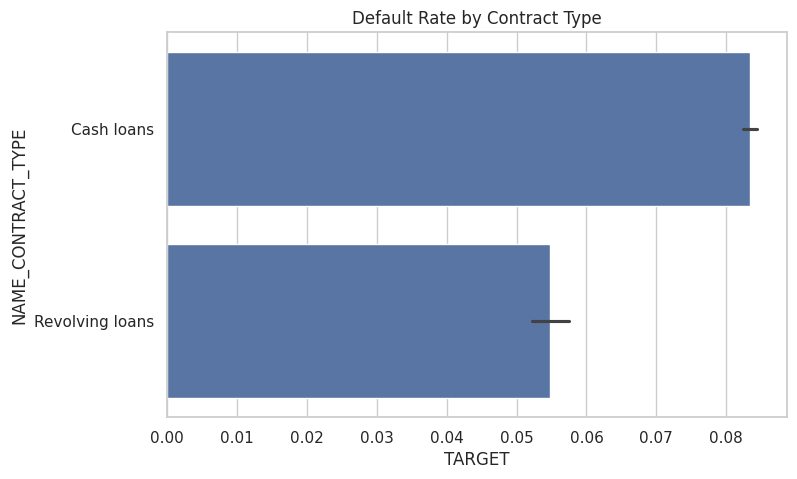

In [64]:
sns.barplot(
    x='TARGET',
    y='NAME_CONTRACT_TYPE',
    data=data
)
plt.title('Default Rate by Contract Type')
plt.show()
